In [38]:
#导入数据处理的库
import pandas as pd
import numpy as np

#导入画图的可视化库
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt中文显示问题
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")


In [39]:
import sys

In [40]:
print(sys.path)

['', 'D:\\Anaconda\\python36.zip', 'D:\\Anaconda\\DLLs', 'D:\\Anaconda\\lib', 'D:\\Anaconda', 'C:\\Users\\38601\\AppData\\Roaming\\Python\\Python36\\site-packages', 'D:\\Anaconda\\lib\\site-packages', 'D:\\Anaconda\\lib\\site-packages\\win32', 'D:\\Anaconda\\lib\\site-packages\\win32\\lib', 'D:\\Anaconda\\lib\\site-packages\\Pythonwin', 'D:\\Anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\38601\\.ipython']


In [41]:
#用户信息数据表user_table

user_info=pd.read_csv("user_table.csv")
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited
0,654951,0,17,Female,US,mobile,android,Direct,3
1,730619,0,27,Male,UK,mobile,iOS,Direct,5
2,261033,0,24,Female,US,mobile,android,Seo,4
3,533685,0,21,Male,UK,desktop,windows,Direct,5
4,699480,0,17,Male,UK,mobile,iOS,Direct,6


In [42]:
#删除两个异常值

user_info = user_info[user_info['age']<100]

In [43]:
user_info['country'].fillna(user_info['country'].mode()[0], inplace=True)

In [44]:
#当用户为新用户，source缺失值填补Seo

user_info['source']=np.where((user_info['source'].isnull())&(user_info['new_user']==1),
         'Seo',user_info['source'])

In [45]:
#当用户为老用户，source缺失值填补direct

user_info['source'].fillna('Direct',inplace=True)

In [46]:
#操作系统为mac,windows,linux 设备为desktop

user_info['device']=np.where((user_info['device'].isnull())&(user_info['operative_system'].isin(['mac','windows','linux'])),
         'desktop',user_info['device'])

In [47]:
#操作系统为ios,android 设备为mobile 

user_info['device']=np.where((user_info['device'].isnull())&(user_info['operative_system'].isin(['iOS','android'])),
         'mobile',user_info['device'])

In [48]:
#用众数填补剩余device缺失值

user_info['device'].fillna(user_info['device'].mode()[0], inplace=True)

In [49]:
#操作系统填补为iOS当用户使用的是mobile

user_info['operative_system']=np.where((user_info['operative_system'].isnull())&(user_info['device']=='mobile'),
         'iOS',user_info['operative_system'])

In [50]:
#操作系统填补为windows当用户使用的是desktop

user_info['operative_system'].fillna('windows',inplace=True)

In [51]:
#填sex补缺失值

user_info['sex']=np.where((user_info['sex'].isnull())&(user_info['operative_system']=='linux'),
         'Male',user_info['sex'])

In [52]:
user_info['sex'].fillna('Female',inplace=True)

In [53]:
user_home=pd.read_csv('home_page_table.csv')
user_listing=pd.read_csv('listing_page_table.csv')
user_product=pd.read_csv('product_page_table.csv')
user_payment=pd.read_csv('payment_page_table.csv')
user_confirmation=pd.read_csv('payment_confirmation_table.csv')

In [54]:
#利用python进行数据分析8.2节：合并数据集 merge

user_info=pd.merge(user_info,user_home,on='user_id',how='left')
user_info.rename(columns={'page': 'home_page'},inplace=True)

In [55]:
user_info=pd.merge(user_info,user_listing,on='user_id',how='left')
user_info.rename(columns={'page': 'listing_page'},inplace=True)

In [56]:
user_info=pd.merge(user_info,user_product,on='user_id',how='left')
user_info.rename(columns={'page': 'product_page'},inplace=True)

In [57]:
user_info=pd.merge(user_info,user_payment,on='user_id',how='left')
user_info.rename(columns={'page': 'payment_page'},inplace=True)

In [58]:
user_info=pd.merge(user_info,user_confirmation,on='user_id',how='left')
user_info.rename(columns={'page': 'confirmation_page'},inplace=True)

In [59]:
for col in ['home_page','listing_page','product_page','payment_page','confirmation_page']:
    user_info[col].fillna(0, inplace=True)

In [60]:
user_info.replace('home_page',1,inplace=True)
user_info.replace('listing_page',1,inplace=True)
user_info.replace('product_page',1,inplace=True)
user_info.replace('payment_page',1,inplace=True)
user_info.replace('payment_confirmation_page',1,inplace=True)

In [61]:
user_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page
0,654951,0,17,Female,US,mobile,android,Direct,3,1,1,1,0,0
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,1,0,0,0,0
2,261033,0,24,Female,US,mobile,android,Seo,4,1,1,0,0,0
3,533685,0,21,Male,UK,desktop,windows,Direct,5,1,1,1,1,0
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,1,1,0,0,0


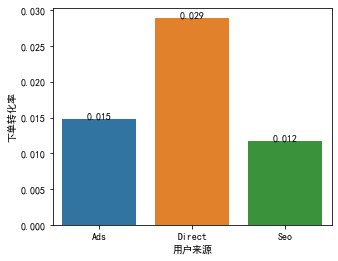

In [63]:
plt.figure(figsize=(5, 4))

# source=pd.DataFrame(user_info['source'].value_counts().reset_index(name='counts'))
source = user_info.groupby(['source'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='source',y='CR',data=source)

for index, row in source.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('用户来源')
plt.ylabel('下单转化率')
plt.show()

AttributeError: 'Series' object has no attribute 'HS'

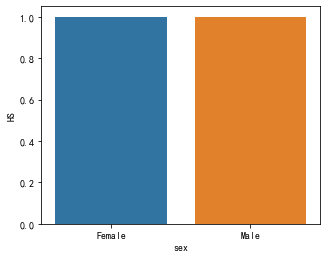

In [64]:
plt.figure(figsize=(5, 4))

# source=pd.DataFrame(user_info['source'].value_counts().reset_index(name='counts'))
sex = user_info.groupby(['sex'])['home_page'].mean().reset_index(name='HS')

g =sns.barplot(x='sex',y='HS',data=sex)

for index, row in source.iterrows():
    g.text(row.name,row.HS,round(row.HS,2),color='black', ha="center")
    
plt.xlabel('性别')
plt.ylabel('下单转化率')
plt.show()

In [103]:
user_info.groupby(['country'])['home_page'].sum().reset_index(name='HS')

,country,HS
0,China,16563
1,Germany,5027
2,UK,15401
3,US,53407


In [104]:
user_info.groupby(['country'])['product_page'].sum().reset_index(name='HS')

,country,HS
0,China,7055
1,Germany,2900
2,UK,8008
3,US,27237


In [105]:
user_info.groupby(['country'])['listing_page'].sum().reset_index(name='HS')

,country,HS
0,China,10665
1,Germany,4008
2,UK,11707
3,US,40011


In [106]:
user_info.groupby(['country'])['payment_page'].sum().reset_index(name='HS')

,country,HS
0,China,889
1,Germany,425
2,UK,1070
3,US,3646


In [107]:
user_info.groupby(['country'])['confirmation_page'].sum().reset_index(name='HS')

,country,HS
0,China,244
1,Germany,151
2,UK,380
3,US,1219


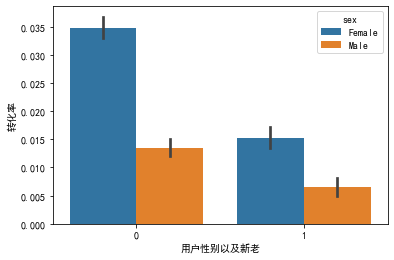

In [108]:
sns.barplot(x='new_user',y='confirmation_page',hue='sex',data=user_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

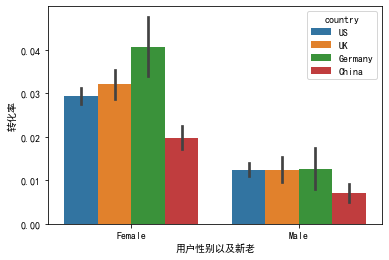

In [92]:
sns.barplot(x='sex',y='confirmation_page',hue='country',data=user_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

In [ ]:
sns.barplot(x='sex',y='confirmation_page',hue='country',data=user_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

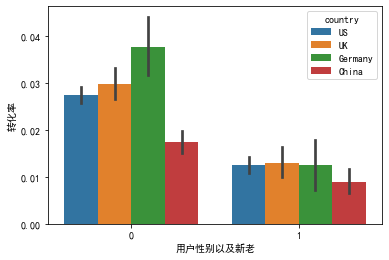

In [76]:
sns.barplot(x='new_user',y='confirmation_page',hue='country',data=user_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

In [30]:
user_info.groupby(['source','new_user'])['confirmation_page'].mean().reset_index(name='CR')

,source,new_user,CR
0,Ads,0,0.016074
1,Ads,1,0.014180
2,Direct,0,0.029814
3,Direct,1,0.008400
4,Seo,0,0.012984
5,Seo,1,0.011165


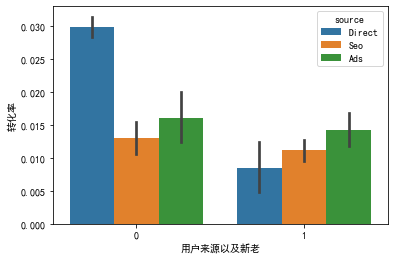

In [31]:
# 用户来源以及新老
sns.barplot(x='new_user',y='confirmation_page',hue='source',data=user_info)
plt.xlabel('用户来源以及新老')
plt.ylabel('转化率')
plt.show()

老用户直接进入平台的下单转化率更高，新用户通过广告进入平台的下单转化率更高

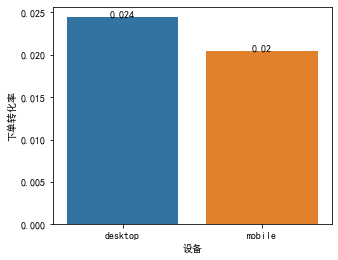

In [33]:
#用户设备
plt.figure(figsize=(5, 4))

# source=pd.DataFrame(user_info['source'].value_counts().reset_index(name='counts'))
device = user_info.groupby(['device'])['confirmation_page'].mean().reset_index(name='CR')

g =sns.barplot(x='device',y='CR',data=source)

for index, row in device.iterrows():
    g.text(row.name,row.CR,round(row.CR,3),color='black', ha="center")
    
plt.xlabel('设备')
plt.ylabel('下单转化率')
plt.show()

**<font color=black size=4 face=雅黑>Step4: 特征工程</font>**

In [78]:
#当deep=false相当于引用，原值改变复制的结果随着改变 等价于model_info1=user_info

model_info=user_info.copy(deep=True)

In [79]:
#把转化converted作为我的label(因变量)

model_info['converted']=model_info['confirmation_page']

In [80]:
model_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page,converted
0,654951,0,17,Female,US,mobile,android,Direct,3,1,1,1,0,0,0
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,1,0,0,0,0,0
2,261033,0,24,Female,US,mobile,android,Seo,4,1,1,0,0,0,0
3,533685,0,21,Male,UK,desktop,windows,Direct,5,1,1,1,1,0,0
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,1,1,0,0,0,0


**<font color=black size=4 face=雅黑>4.1: 特征构建</font>**

In [81]:
#新增一个特征：platform:app和web 用户浏览的平台是app还是web。

model_info['platform']= model_info['device']

In [82]:
#将mobile转换为app，desktop转换为web

platform={'mobile':'app','desktop':'web'}

model_info['platform']=model_info['platform'].map(platform)

In [83]:
model_info.head()

,user_id,new_user,age,sex,country,device,operative_system,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page,converted,platform
0,654951,0,17,Female,US,mobile,android,Direct,3,1,1,1,0,0,0,app
1,730619,0,27,Male,UK,mobile,iOS,Direct,5,1,0,0,0,0,0,app
2,261033,0,24,Female,US,mobile,android,Seo,4,1,1,0,0,0,0,app
3,533685,0,21,Male,UK,desktop,windows,Direct,5,1,1,1,1,0,0,web
4,699480,0,17,Male,UK,mobile,iOS,Direct,6,1,1,0,0,0,0,app


In [84]:
#合并两个特征为一个特征：os:device+operative_system

model_info['os']=model_info['device']+ '_'+ model_info['operative_system']

In [85]:
model_info['os']

0         mobile_android
1             mobile_iOS
2         mobile_android
3        desktop_windows
4             mobile_iOS
5        desktop_windows
6         mobile_android
7             mobile_iOS
8        desktop_windows
9        desktop_windows
10           desktop_mac
11       desktop_windows
12          mobile_other
13           desktop_mac
14       desktop_windows
15            mobile_iOS
16       desktop_windows
17            mobile_iOS
18           desktop_mac
19            mobile_iOS
20        mobile_android
21            mobile_iOS
22       desktop_windows
23       desktop_windows
24       desktop_windows
25            mobile_iOS
26        mobile_android
27        mobile_android
28         desktop_linux
29       desktop_windows
              ...       
90368     mobile_android
90369     mobile_android
90370    desktop_windows
90371     mobile_android
90372         mobile_iOS
90373    desktop_windows
90374         mobile_iOS
90375         mobile_iOS
90376        desktop_mac


In [86]:
#将原始数据的device和operative_system删除

model_info.drop(['device','operative_system'],axis=1,inplace=True)

In [87]:
model_info.head()

,user_id,new_user,age,sex,country,source,total_pages_visited,home_page,listing_page,product_page,payment_page,confirmation_page,converted,platform,os
0,654951,0,17,Female,US,Direct,3,1,1,1,0,0,0,app,mobile_android
1,730619,0,27,Male,UK,Direct,5,1,0,0,0,0,0,app,mobile_iOS
2,261033,0,24,Female,US,Seo,4,1,1,0,0,0,0,app,mobile_android
3,533685,0,21,Male,UK,Direct,5,1,1,1,1,0,0,web,desktop_windows
4,699480,0,17,Male,UK,Direct,6,1,1,0,0,0,0,app,mobile_iOS


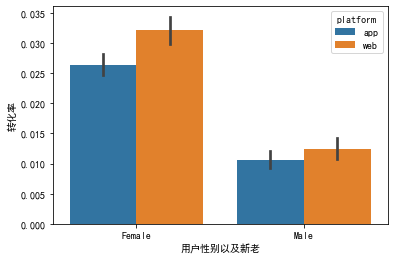

In [89]:
sns.barplot(x='sex',y='confirmation_page',hue='platform',data=model_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

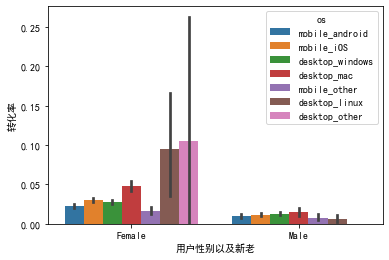

In [90]:
sns.barplot(x='sex',y='confirmation_page',hue='os',data=model_info)
plt.xlabel('用户性别以及新老')
plt.ylabel('转化率')
plt.show()

**<font color=black size=4 face=雅黑>4.2: 特征选择</font>**

In [89]:
#去除掉home_page,listing_page,product_page,payment_page,confirmation_page

model_info.drop(['user_id','home_page','listing_page','product_page','payment_page','confirmation_page'],axis=1,inplace=True)

**<font color=black size=4 face=雅黑>4.3: 特征处理</font>**

对于逻辑回归模型:

* 连续型数据特征：不处理或标准化处理，
* 无序类别特征：OneHotEncoder,
* 有序类别特征：labelEncoder

In [90]:
data_lR = pd.get_dummies(model_info, drop_first=False)

In [91]:
#连续特征age,total_pages_visited进行最值归一化处理

from sklearn.preprocessing import MinMaxScaler


data_lR['age']=MinMaxScaler().fit_transform(data_lR['age'].values.reshape(-1, 1)).reshape(1,-1)[0]

data_lR['total_pages_visited']=MinMaxScaler().fit_transform(data_lR['total_pages_visited'].values.reshape(-1, 1)).reshape(1,-1)[0]

In [92]:
data_lR.head()

,new_user,age,total_pages_visited,converted,sex_Female,sex_Male,country_China,country_Germany,country_UK,country_US,...,source_Seo,platform_app,platform_web,os_desktop_linux,os_desktop_mac,os_desktop_other,os_desktop_windows,os_mobile_android,os_mobile_iOS,os_mobile_other
0,0,0.00,0.074074,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0.20,0.148148,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0.14,0.111111,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
3,0,0.08,0.148148,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0.00,0.185185,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


对于树模型（决策树和随机森林):

* 连续型数据特征不处理，
* 类别特征OneHotEncoder和labelencoder都可以，数值只是个类别符号，没有大小的概念，即没有偏序关系，只有特征处于他分布的哪一部分的概念

In [1]:
#OneHotEncoder
data_tree = pd.get_dummies(model_info, drop_first=False)

NameError: name 'pd' is not defined

In [94]:
#labelencoder
from sklearn import preprocessing
data_tree1=model_info.copy(deep=True)

#性别

sex_le=preprocessing.LabelEncoder()
data_tree1['sex']=sex_le.fit_transform(data_tree1['sex'])

In [95]:
sex_le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [96]:
sex_le.transform(['Female','Male'])

array([0, 1])

**<font color=black size=4 face=雅黑>Step5: 建模</font>**

**<font color=black size=4 face=雅黑>1.逻辑回归</font>**

1.1 划分训练集和测试集

In [97]:
from sklearn.model_selection import train_test_split
np.random.seed(4684)

x=data_lR.drop(['converted'],axis=1)
y=data_lR['converted']

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

1.2 用训练集训练模型

In [98]:
from sklearn.linear_model import LogisticRegression

logic_model=LogisticRegression(random_state=42)

#设置显示模型参数
from sklearn import set_config
set_config(print_changed_only=False)

logic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

1.3 用训练好的模型来预测测试集

In [99]:
y_prediction = logic_model.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_auc_score

data={'y_test':y_test,
      'y_predicted':y_prediction}
df = pd.DataFrame(data,columns=['y_test','y_predicted'])

#Crosstab 交叉列表取值,第一个参数是列，第二个参数是行
confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix,'\n')
print('accuracy  %s' % accuracy_score(y_test,y_prediction))
print('precision %s' % precision_score(y_test,y_prediction))
print('recall    %s' % recall_score(y_test,y_prediction))
print('f1        %s' % f1_score(y_test,y_prediction))

Predicted      0    1
Actual               
0          17628   66
1            189  197 

accuracy  0.9858960176991151
precision 0.7490494296577946
recall    0.5103626943005182
f1        0.6070878274268106


如何选择合适的模型评估方法：根据项目背景以及目的

测试集用户有18080个，实际会下单的用户有189+197=386个，预测会下单的用户有66+197=263

precision精确率=197（预测下单=实际下单：预测正确）/（66+197）（所有预测会下单的用户数）=0.749

recall召回率=197预测下单=实际下单：预测正确）/（189+197）（所有实际会下单的用户数）=0.51

F1=2*（precision * Recall)/(precision + Recall) 这是一个综合考虑p和r的指标。


1.4 根据模型得到特征重要性

In [101]:
feature_importances = pd.Series(abs(logic_model.coef_[0]), index=data_lR.drop(['converted'], axis=1).columns)
feature_importances.sort_values(ascending=False)

total_pages_visited    12.146589
age                     4.361563
new_user                1.475796
sex_Male                0.491903
sex_Female              0.489664
os_desktop_mac          0.417590
os_desktop_linux        0.356466
os_mobile_other         0.343543
source_Direct           0.341692
source_Seo              0.314860
country_China           0.277349
os_mobile_iOS           0.204322
os_desktop_other        0.159445
platform_app            0.137184
platform_web            0.134945
country_Germany         0.132374
country_US              0.095371
os_desktop_windows      0.085623
country_UK              0.047366
source_Ads              0.029070
os_mobile_android       0.002036
dtype: float64

**<font color=black size=4 face=雅黑>2.决策树</font>**

1.1 划分训练集和测试集

In [102]:
from sklearn.model_selection import train_test_split
np.random.seed(4684)

x=data_tree.drop(['converted'],axis=1)
y=data_tree['converted']

#划分训练集和测试集
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

1.2 用训练集训练模型

In [103]:
#决策树

#导入需要的模块
from sklearn import tree

#实例化
dt = tree.DecisionTreeClassifier(random_state=42)

#用训练集训练模型
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

1.3 用训练好的模型来预测测试集

In [104]:
y_prediction = dt.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
data={'y_test':y_test,
      'y_predicted':y_prediction}
df = pd.DataFrame(data,columns=['y_test','y_predicted'])

#Crosstab 交叉列表取值,第一个参数是列，第二个参数是行
confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix,'\n')

print('accuracy  %s' % accuracy_score(y_test,y_prediction))
print('precision %s' % precision_score(y_test,y_prediction))
print('recall    %s' % recall_score(y_test,y_prediction))
print('f1        %s' % f1_score(y_test,y_prediction))

Predicted      0    1
Actual               
0          17523  171
1            194  192 

accuracy  0.9798119469026548
precision 0.5289256198347108
recall    0.49740932642487046
f1        0.5126835781041388


<font color=black size=4 face=雅黑>**Step6: 调参:决策树(为例）**</font>

In [ ]:
#网格搜索：将各个参数可能的取值进行排列组合，列出所有可能的组合结果生成“网格”，
# 然后将各组合用于模型训练，并使用交叉验证对表现进行评估, 选出最佳的组合。

from sklearn.model_selection import GridSearchCV

parameters={
    'criterion':('gini','entropy')
    ,'splitter':('best','random')
    ,'max_depth':[*range(1,10)]
    ,'min_samples_leaf':[*range(1,50,5)]
    ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
}

dt=tree.DecisionTreeClassifier()

#estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数
#param_grid:需要最优化的参数的取值，值为字典或者列表
#cv:交叉验证参数，默认None，使用三折交叉验证

GS=GridSearchCV(dt,parameters,cv=5)

GS=GS.fit(x_train,y_train)

In [200]:
#随机搜索：从超参数空间中随机选择参数组合。

from sklearn.model_selection import RandomizedSearchCV

parameters={
    'criterion':('gini','entropy')
    ,'splitter':('best','random')
    ,'max_depth':[*range(1,10)]
    ,'min_samples_leaf':[*range(1,50,5)]
    ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]
}

dt=tree.DecisionTreeClassifier(random_state=42)

#estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数
#param_grid:需要最优化的参数的取值，值为字典或者列表
#n_iter组

RS=RandomizedSearchCV(dt,parameters,n_iter=100,scoring='f1')

RS=RS.fit(x_train,y_train)

In [201]:
RS.best_params_

{'splitter': 'random',
 'min_samples_leaf': 11,
 'min_impurity_decrease': 0.0,
 'max_depth': 9,
 'criterion': 'entropy'}

In [203]:
RS.best_score_

0.6188898760365132

<font color=black size=4 face=雅黑>**Step7: 重新建模预测**</font>

In [106]:
dt = tree.DecisionTreeClassifier(random_state=42,splitter='random',min_samples_leaf=11,
                                min_impurity_decrease=0.0,max_depth=9,criterion='entropy')

In [107]:
#用训练集训练模型
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='random')

In [108]:
y_prediction = dt.predict(x_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
data={'y_test':y_test,
      'y_predicted':y_prediction}
df = pd.DataFrame(data,columns=['y_test','y_predicted'])

#Crosstab 交叉列表取值,第一个参数是列，第二个参数是行
confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix,'\n')
print('accuracy  %s' % accuracy_score(y_test,y_prediction))
print('precision %s' % precision_score(y_test,y_prediction))
print('recall    %s' % recall_score(y_test,y_prediction))
print('f1        %s' % f1_score(y_test,y_prediction))

Predicted      0    1
Actual               
0          17620   74
1            187  199 

accuracy  0.9855641592920354
precision 0.7289377289377289
recall    0.5155440414507773
f1        0.6039453717754173


In [110]:
feature_importances = pd.Series(dt.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False)

total_pages_visited    0.863082
new_user               0.062000
age                    0.032539
sex_Female             0.010606
source_Direct          0.005350
os_desktop_mac         0.004548
source_Seo             0.004526
sex_Male               0.004215
country_China          0.003287
source_Ads             0.002041
os_desktop_windows     0.001803
os_mobile_iOS          0.001230
country_US             0.001160
platform_web           0.000880
platform_app           0.000828
os_mobile_android      0.000791
os_desktop_linux       0.000524
country_UK             0.000300
country_Germany        0.000289
os_desktop_other       0.000000
os_mobile_other        0.000000
dtype: float64

<font color=black size=4 face=雅黑>**Step8: 解读模型**</font>

**<font color=black size=3 face=雅黑>特征重要性展示的是哪些变量对预测的影响最大，而部分依赖图展示的是特征如何影响模型预测的。</font>**

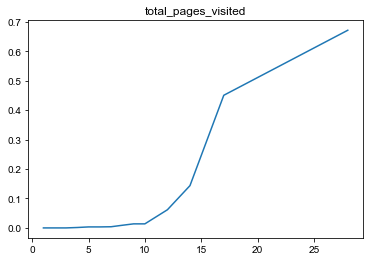

In [111]:
#total_pages_visited

#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

from pdpbox import pdp, info_plots
pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature='total_pages_visited', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='total_pages_visited')
plt.show()

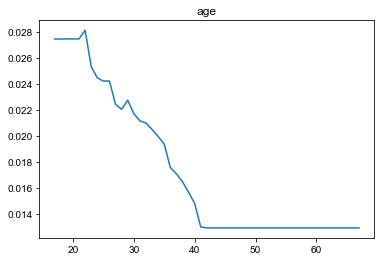

In [112]:
#age
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='age')
plt.show()

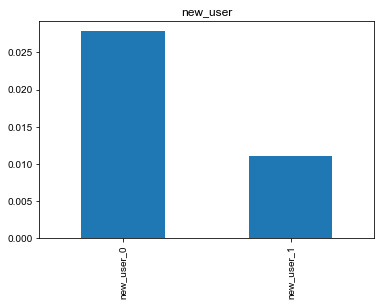

In [113]:
#new_user
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。
from pdpbox import pdp, info_plots 
#country
pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature='new_user', 
                          num_grid_points=50)

pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='new_user')
plt.show()

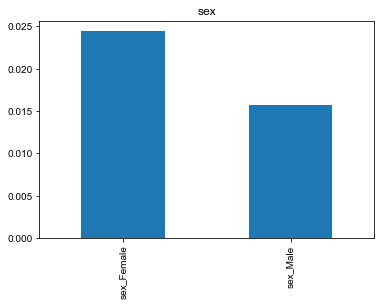

In [114]:
#sex
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_test,      
                          model_features=list(x_train), 
                          feature=['sex_Female', 'sex_Male'],
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='sex')
plt.show()

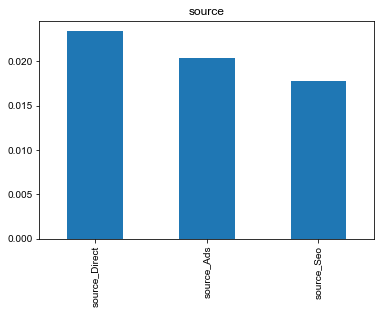

In [115]:
#source
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

from pdpbox import pdp, info_plots

pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature=['source_Direct','source_Ads','source_Seo'],
                          num_grid_points=50)

pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='source')
plt.show()

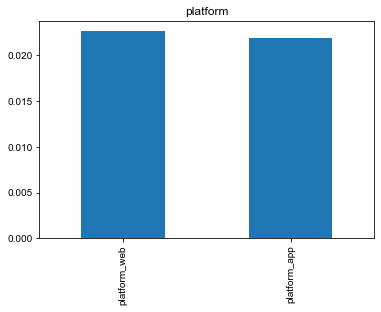

In [116]:
#platform
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

from pdpbox import pdp, info_plots

pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature=['platform_app','platform_web'],
                          num_grid_points=50)

pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='platform')
plt.show()

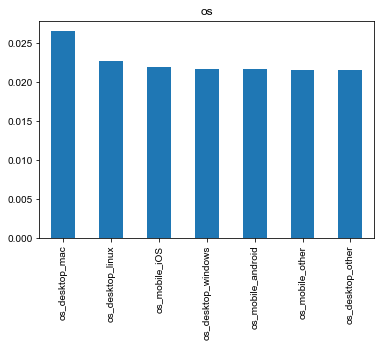

In [117]:
#os
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。

from pdpbox import pdp, info_plots
  
pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature=['os_desktop_linux', 'os_desktop_mac', 'os_desktop_other', 'os_desktop_windows','os_mobile_android', 'os_mobile_iOS', 'os_mobile_other'], 
                          num_grid_points=50)

pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='os')
plt.show()

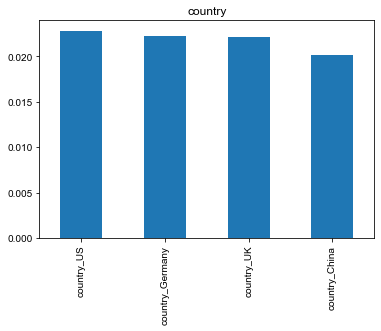

In [118]:
#country
#partial dependency plot部分依赖图，部分依赖图则可以反映这个特征如何影响了预测。
from pdpbox import pdp, info_plots
pdp_iso = pdp.pdp_isolate(model=dt, 
                          dataset=x_train,      
                          model_features=list(x_train), 
                          feature=['country_China','country_Germany','country_UK','country_US'], 
                          num_grid_points=50)

pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='country')
plt.show()

In [119]:
#现在建立一个简单的决策树，检查2或3个最重要的特征。

import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

dt = tree.DecisionTreeClassifier(random_state=42,splitter='random',min_samples_leaf=11,
                                min_impurity_decrease=0.0,max_depth=3,criterion='entropy')
  
dt.fit(x_train,y_train)
  
#visualize it
export_graphviz(dt, out_file="tree_conversion.dot", feature_names=x_train.columns,class_names=['no_convert','converted'], proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'

**<font color=black size=4 face=雅黑>3.随机森林</font>**

1.1划分训练集和测试集

In [215]:
from sklearn.model_selection import train_test_split
np.random.seed(4684)

x=data_tree.drop(['converted'],axis=1)
y=data_tree['converted']

#划分训练集和测试集
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8)

1.2 用训练集训练模型

In [216]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(oob_score=True, random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

1.3 用训练好的模型来预测测试集

In [217]:
y_prediction=rf.predict(x_test)
data={'y_test':y_test,
      'y_predicted':y_prediction}
df = pd.DataFrame(data,columns=['y_test','y_predicted'])

confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix,'\n')

print('accuracy  %s' % accuracy_score(y_test,y_prediction))
print('precision %s' % precision_score(y_test,y_prediction))
print('recall    %s' % recall_score(y_test,y_prediction))
print('f1        %s' % f1_score(y_test,y_prediction))

Predicted      0    1
Actual               
0          17591  103
1            185  201 

accuracy  0.984070796460177
precision 0.6611842105263158
recall    0.5207253886010362
f1        0.5826086956521739


1.4 调参（网格搜索）按照参数的重要性一个个找

In [218]:
#n_estimators

from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':[50,100,160,200,250]}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='f1',cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 250}, 0.5491679063644883)

In [221]:
#max_depth,min_samples_split

param_test2 = {'max_depth':range(2,14,2)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 250, min_samples_split=100,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test2, scoring='f1',cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 12}, 0.5901646385641282)

In [224]:
#min_samples_leaf

param_test3 = {'min_samples_split':range(20,50,80), 'min_samples_leaf':range(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 250, max_depth=12,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test3, scoring='f1',cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 10, 'min_samples_split': 20}, 0.6060253020523237)

In [225]:
#max_features

param_test4 = {'max_features':range(3,11,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_split=20,
                                  min_samples_leaf=10,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='f1',cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 9}, 0.6371950463640454)

1.4 调参（随机搜索）从超参数空间中随机选择参数组合。

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters={
    'n_estimators':[*range(0,200,10)]
    ,'criterion':('gini','entropy')
    ,'max_depth':[*range(1,10)]
    ,'min_samples_leaf':[*range(1,50,5)]
    ,'min_impurity_decrease':[*np.linspace(0.01,0.5,50)]
}

rf=RandomForestClassifier(oob_score=True, random_state=10)

#estimator:选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数
#param_grid:需要最优化的参数的取值，值为字典或者列表
#n_iter组

RS=RandomizedSearchCV(rf,parameters,scoring='precision',n_iter=100)

RS=RS.fit(x_train,y_train)

RS.best_params_

1.5 重新建模预测

In [226]:
rf=RandomForestClassifier(n_estimators=250, max_depth=12, min_samples_split=10,max_features=9,
                          min_samples_leaf=20,oob_score=True, random_state=10)

In [227]:
rf=rf.fit(x_train,y_train)

In [228]:
y_prediction=rf.predict(x_test)
data={'y_test':y_test,
      'y_predicted':y_prediction}
df = pd.DataFrame(data,columns=['y_test','y_predicted'])

confusion_matrix = pd.crosstab(df['y_test'], df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix,'\n')

print('accuracy  %s' % accuracy_score(y_test,y_prediction))
print('precision %s' % precision_score(y_test,y_prediction))
print('recall    %s' % recall_score(y_test,y_prediction))
print('f1        %s' % f1_score(y_test,y_prediction))

Predicted      0    1
Actual               
0          17630   64
1            183  203 

accuracy  0.9863384955752212
precision 0.7602996254681648
recall    0.5259067357512953
f1        0.6217457886676876


1.6特征重要性

In [229]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False)

total_pages_visited    0.784964
new_user               0.075328
age                    0.060537
source_Direct          0.030933
source_Seo             0.008441
sex_Female             0.008195
sex_Male               0.007767
country_US             0.003831
os_mobile_iOS          0.002949
source_Ads             0.002595
platform_app           0.002517
platform_web           0.002263
os_desktop_mac         0.002228
os_desktop_windows     0.002025
country_China          0.001897
os_mobile_android      0.001692
country_UK             0.001245
country_Germany        0.000397
os_mobile_other        0.000165
os_desktop_linux       0.000032
os_desktop_other       0.000000
dtype: float64